# 確率変数の分布の特性値

主な分布の特性値としては、期待値、**中央値**、**最頻値**(**モード**)などの位置の指標と、分散、標準偏差、**四分位範囲**などの散らばりの指標がある。  
中央値と最頻値は以下のように定義される。  
中央値：$P(X \leq a)=0.5$となる$a$    
最頻値：確率変数Xの確率密度関数$f(x)$が最大となる$x$

In [40]:
# 中央値と最頻値を算出する
import statistics

l = [10, 1, 3, 7, 1, 5, 6, 8, 9, 2, 2, 2]
median = statistics.median(l)
print(f"中央値:{median}")

mode = statistics.mode(l)
print(f"最頻値:{mode}")

中央値:4.0
最頻値:2


左右対称かつ単峰の分布の場合、期待値、中央値、最頻値は全て一致する。  
右に裾が長い場合は、最頻値<中央値<期待値で、左に裾が長い場合は、期待値<中央値<最頻値となる。

標準偏差と四分位範囲は以下のように定義される。  
標準偏差：$\sqrt{V[X]}$  
四分位範囲：($P(X \leq b)=0.75$となる$b$) - ($P(X \leq c)=0.25$となる$c$)(=第3四分位数-第1四分位数)

In [41]:
# 標準偏差と四分位範囲を計算
variance = statistics.pvariance(l)
pstdev = variance**0.5
print(f"標準偏差:{pstdev}")

pstdev2 = statistics.pstdev(l)
print(f"標準偏差:{pstdev2} *pstdevで直接計算")

import numpy as np
q75, q25 = np.percentile(l, [75 ,25])
iqr = q75 - q25
print(f"第1四分位数:{q25}, 第3四分位数:{q75}, 四分位範囲:{iqr}")

標準偏差:3.1180478223116177
標準偏差:3.1180478223116177 *pstdevで直接計算
第1四分位数:2.0, 第3四分位数:7.25, 四分位範囲:5.25


非負値の確率変数に対する散らばりの指標としては**変動係数**がある。  
大きな値を取りやすい確率変数の標準偏差は大きくなりやすく、小さな値しか取らない確率変数の標準偏差は小さくなりやすい。  
そのような異なる単位のデータの散らばりを比較する際に変動係数は用いられる。  
変動係数：$\sqrt{V[X]}/E[X]$(標準偏差/期待値)

In [42]:
# 変動係数を計算
mean = statistics.mean(l)
cv = pstdev/mean
print(f"標準偏差:{pstdev:.3f}, 期待値:{mean:.3f}, 変動係数:{cv:.3f}")

標準偏差:3.118, 期待値:4.667, 変動係数:0.668


その他の散らばりの特性値として歪度、尖度がある。  
歪度：$\frac{E[(X-E[X])^3]}{(V[X])^(3/2)}$  
尖度：$\frac{E[(X-E[X])^4]}{(V[X])^2}$  
分布が左右対称であれば歪度は0となり、右に裾が長ければ正、左なら負となる傾向がある。  
尖度は必ず0以上であり、正規分布の場合は3となるため、3よりも大きいかどうかで検討することが多い。  
また、尖度については正規分布を0として、$\frac{E[(X-E[X])^4]}{(V[X])^2}-3$と定義されることもある。

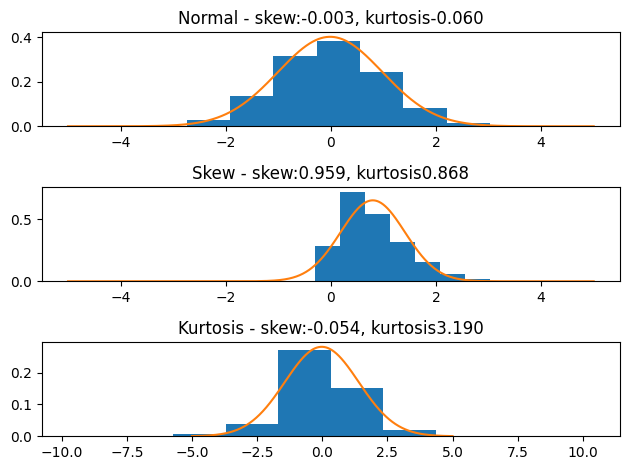

In [43]:
# 歪度と尖度を計算
import matplotlib.pyplot as plt

from scipy.stats import laplace
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import skewnorm

norm_data = norm.rvs(loc=0, scale=1, size=10000) # 正規分布データ
skew_data = skewnorm.rvs(10, size=10000) # 歪度データ
kurtosis_data = laplace.rvs(size=10000) # 尖度データ

x = np.linspace(-5, 5, 1000)
norm_pdf = norm.pdf(x, loc=norm_data.mean(), scale=norm_data.std())
skew_pdf = norm.pdf(x, loc=skew_data.mean(), scale=skew_data.std())
kurtosis_pdf = norm.pdf(x, loc=kurtosis_data.mean(), scale=kurtosis_data.std())

fig, ax = plt.subplots(3, 1)
ax[0].hist(norm_data, density=True)
ax[0].plot(x, norm_pdf)
ax[0].set_title(f"Normal - skew:{skew(norm_data):.3f}, kurtosis{kurtosis(norm_data):.3f}")

ax[1].hist(skew_data, density=True)
ax[1].set_title(f"Skew - skew:{skew(skew_data):.3f}, kurtosis{kurtosis(skew_data):.3f}")
ax[1].plot(x, skew_pdf)

ax[2].hist(kurtosis_data, density=True)
ax[2].set_title(f"Kurtosis - skew:{skew(kurtosis_data):.3f}, kurtosis{kurtosis(kurtosis_data):.3f}")
ax[2].plot(x, kurtosis_pdf)

plt.tight_layout()
plt.show()

# 同時分布の特性値

2つの確率変数$X,Y$の関係を表す概念として相関がある。  
また、確率変数$X,Y$の相関を示す指標として、**共分散**や**相関係数**がある。  
共分散：$Cov[X,Y] = E[(X-E[X])(Y-E[Y])] = E[XY]-E[X]E[Y]$  
相関係数：$p[X,Y] = \frac {Cov[X,Y]}{\sqrt{V[X]V[Y]}} (-1 \leq p[X,Y] \leq 1)$  
相関係数が1の時、$X,Y$には一次式の関係がある。  
一方で$X,Y$が独立であれば、共分散も相関係数も0になる。

共分散:0.099
相関係数:0.743


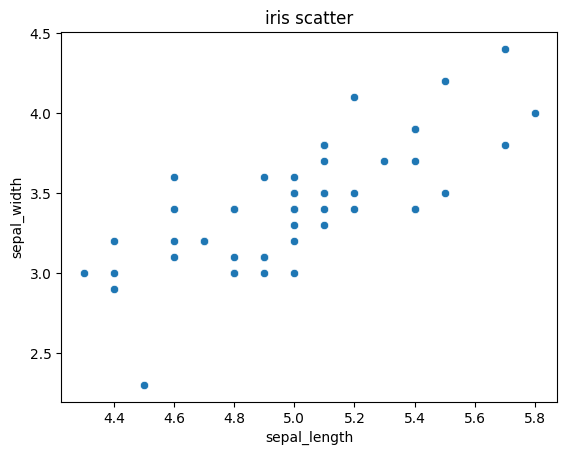

In [53]:
# 共分散と相関係数を計算
import seaborn as sns
df_iris = sns.load_dataset('iris')
sepal_length = df_iris[df_iris['species']=='setosa']['sepal_length']
sepal_width = df_iris[df_iris['species']=='setosa']['sepal_width']

cov = np.cov(sepal_length, sepal_width)[0, 1]
print(f'共分散:{cov:.3f}')
corr = np.corrcoef(sepal_length, sepal_width)[0, 1]
print(f'相関係数:{corr:.3f}')

sns.scatterplot(x=sepal_length, y=sepal_width)
plt.title("iris scatter")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

確率変数$X,Y$それぞれに別の確率変数$Z$が影響を与えている場合、$X$と$Y$の相関は強くなりやすい。  
このような相関のことを擬似相関という。この場合は$Z$の影響を取り除いた相関を考えたい。  
ある変数の影響を除いた相関係数のことを**偏相関係数**という。

In [45]:
#偏相関行列を計算
import pingouin as pg

partial_corr_matrix = pg.pcorr(df_iris)
partial_corr_matrix

/usr/local/lib/python3.11/site-packages/pingouin/correlation.py:952: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  V = self.cov()  # Covariance matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.628571,0.719066,-0.339617
sepal_width,0.628571,1.000000,-0.615292,0.352626
petal_length,0.719066,-0.615292,1.000000,0.870770
petal_width,-0.339617,0.352626,0.870770,1.000000


# 特性値の性質

期待値に関する性質  
$E[aX+bY+c] = aE[X]+bE[Y]+c$が成立する。  
また$X,Y$が独立であれば、$E[XY] = E[X]E[Y]$が成立する。

In [46]:
a = 2.0
b = 3.0
c = 10.0
X = np.array([1, 2, 3, 4])
Y = np.array([5, 6, 7, 8])

E_all = np.mean(a*X+b*Y+c)
E_div = a*np.mean(X)+b*np.mean(Y)+c
print(f"期待値1:{E_all}, 期待値2:{E_div}") # 一致する

期待値1:34.5, 期待値2:34.5


分散に関する性質  
$V[aX+b] = a^2V[X]$  
$V[X \pm Y] = V[X]+V[Y] \pm sCov[X,Y]$が成り立つ。  
この時$X,Y$が独立であれば、$V[X \pm Y] = V[X]+V[Y]$である

In [47]:
V_all = np.var(a*X+b)
V_div = a**2*np.var(X)
print(f"分散1:{V_all}, 分散2:{V_div}") # 一致する

分散1:5.0, 分散2:5.0


# データの特性値

実際に観測されたデータに対する特性値も同様に計算される。  
これまでの算術平均以外に、加重平均、幾何平均、調和平均がある。  

| 平均の種類 | 説明 | 計算式 |
| ---- | ---- | ---- |
| 加重平均 | 観測地$x_i$が割合$w_i$で得られる場合の全平均 | $\sum_{i=1}^{n}{w_ix_i}$ *重み...$w_1,w_2, ..., w_n$ |
| 幾何平均 | 積に関する平均 | $(x_1 \times x_n \times ... \times x_n)^{\frac{1}{n}}$ |
| 調和平均 | 割合の平均 | $\frac{1}{n} \sum_{i=1}^{n}{1/x_i}$の逆数 | 


In [48]:
# 各平均を計算
from scipy.stats.mstats import gmean
from scipy.stats import hmean

data = np.array([5,5,10,10,20,20,30])
weights = np.array([0.25, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1])

normal_mean = np.mean(data)
print(f"算術平均:{normal_mean:.3f}")

weighted_mean = np.average(data, weights=weights)
print(f"加重平均:{weighted_mean:.3f}")

geometric_mean = gmean(data)
print(f"幾何平均:{geometric_mean:.3f}")

harmonic_mean = hmean(data)
print(f"調和平均:{harmonic_mean:.3f}")

算術平均:14.286
加重平均:11.500
幾何平均:11.699
調和平均:9.545


# 平均ベクトルと分散共分散行列

多次元の確率ベクトルの場合、期待値もベクトルとなる。  
また、ベクトル同士の共分散は**分散共分散行列**となり、ベクトルの相関係数を要素とする行列を**相関行列**と呼ぶ。

In [49]:
#平均ベクトルを計算
df_iris.mean(numeric_only=True)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [50]:
# 分散共分散行列を計算
df_iris.cov(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [51]:
# 相関行列を計算
df_iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
